# This notebook shows how to model sulfide fractionation factors
- We reproduce the modelling of https://doi.org/10.1016/j.chemgeo.2023.121325 to test our coding of the Miyoshi and Fiege model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss

## Lets calculate the different 1000 ln α values 
- We use Miyoshi et al. 1984 (https://doi.org/10.2343/geochemj.18.75) and Fiege et al (2015- 10.1016/j.chemgeo.2014.11.012)-
- We perform calculations for Temperatures ranging from 750 - 1150, and QFM values from 0 to 3 (as in Fig. 8b of Rezeau et al. 2023 - https://doi.org/10.1016/j.chemgeo.2023.121325)

In [3]:
# Set deltaQFM values
deltaQFM=np.linspace(0, 3, 100)
# Set T values
T_K=np.linspace(750, 1150)+273.15
# Calculate S6/St for these deltaQFM values using Jugo
Sprop=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=deltaQFM)
# calculate fractionatoin factors for different S prop at 1130 C
df_1130=ss.calculate_S_isotope_factors(T_K=1130+273.15, S6St_Liq=Sprop)
df_1130.head()


replacing T with series


,T_K,T_C,lna_FeS_H2S_1000,lna_S2_SO4_1000_M,lna_H2S_SO4_1000_M,lna_H2S_S2_1000_M,lna_FeS_S2_1000_M,lna_FeS_SO4_1000_M,lna_H2S_SO4_1000_F,lna_H2S_S2_1000_F,lna_S2_SO4_1000_F,lna_FeS_S2_1000_F,lna_FeS_SO4_1000_F,a_FeS_S2_F,a_FeS_SO4_F,a_FeS_S2_M,a_FeS_SO4_M,a_FeS_ST_F,a_FeS_ST_M
0,1403.15,1130.0,0.036198,-3.568578,-3.111453,0.457124,0.493323,-3.075255,-3.111453,3.005808,-6.117262,3.042006,-3.075255,1.003047,0.996929,1.000493,0.996929,1.002998,1.000465
1,1403.15,1130.0,0.036198,-3.568578,-3.111453,0.457124,0.493323,-3.075255,-3.111453,3.005808,-6.117262,3.042006,-3.075255,1.003047,0.996929,1.000493,0.996929,1.002991,1.000461
2,1403.15,1130.0,0.036198,-3.568578,-3.111453,0.457124,0.493323,-3.075255,-3.111453,3.005808,-6.117262,3.042006,-3.075255,1.003047,0.996929,1.000493,0.996929,1.002983,1.000456
3,1403.15,1130.0,0.036198,-3.568578,-3.111453,0.457124,0.493323,-3.075255,-3.111453,3.005808,-6.117262,3.042006,-3.075255,1.003047,0.996929,1.000493,0.996929,1.002974,1.000451
4,1403.15,1130.0,0.036198,-3.568578,-3.111453,0.457124,0.493323,-3.075255,-3.111453,3.005808,-6.117262,3.042006,-3.075255,1.003047,0.996929,1.000493,0.996929,1.002963,1.000445


In [4]:
# Calculate different fractionation factors for different temps
df_temp=ss.calculate_S_isotope_factors(T_K=T_K)
df_temp.head()

,T_K,T_C,lna_FeS_H2S_1000,lna_S2_SO4_1000_M,lna_H2S_SO4_1000_M,lna_H2S_S2_1000_M,lna_FeS_S2_1000_M,lna_FeS_SO4_1000_M,lna_H2S_SO4_1000_F,lna_H2S_S2_1000_F,lna_S2_SO4_1000_F,lna_FeS_S2_1000_F,lna_FeS_SO4_1000_F,a_FeS_S2_F,a_FeS_SO4_F,a_FeS_S2_M,a_FeS_SO4_M
0,1023.150000,750.000000,0.093365,-6.878921,-6.019187,0.859734,0.953098,-5.925822,-6.019187,7.855013,-13.874200,7.948378,-5.925822,1.007980,0.994092,1.000954,0.994092
1,1031.313265,758.163265,0.091165,-6.767457,-5.921280,0.846177,0.937342,-5.830115,-5.921280,7.691734,-13.613013,7.782899,-5.830115,1.007813,0.994187,1.000938,0.994187
2,1039.476531,766.326531,0.089034,-6.658609,-5.825670,0.832939,0.921973,-5.736636,-5.825670,7.532286,-13.357956,7.621320,-5.736636,1.007650,0.994280,1.000922,0.994280
3,1047.639796,774.489796,0.086969,-6.552295,-5.732286,0.820009,0.906978,-5.645317,-5.732286,7.376551,-13.108837,7.463520,-5.645317,1.007491,0.994371,1.000907,0.994371
4,1055.803061,782.653061,0.084967,-6.448438,-5.641060,0.807378,0.892345,-5.556093,-5.641060,7.224414,-12.865474,7.309381,-5.556093,1.007336,0.994459,1.000893,0.994459


## Now lets plot to match their figure

(0.0, 3.0)

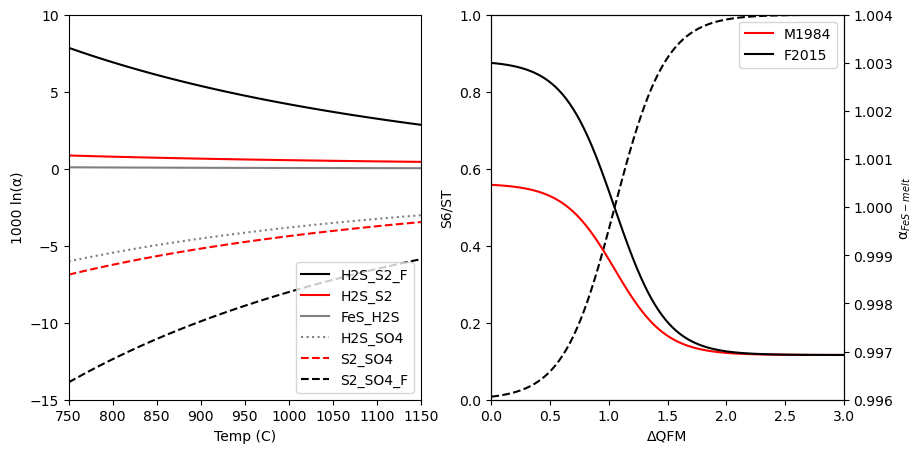

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(T_K-273.15, df_temp['lna_H2S_S2_1000_F'], '-', color='black', label='H2S_S2_F')
ax1.plot(T_K-273.15, df_temp['lna_H2S_S2_1000_M'], '-', color='red', label='H2S_S2')
ax1.plot(T_K-273.15, df_temp['lna_FeS_H2S_1000'], '-', color='grey', label='FeS_H2S')
ax1.plot(T_K-273.15, df_temp['lna_H2S_SO4_1000_M'], ':', color='grey', label='H2S_SO4')
ax1.plot(T_K-273.15, df_temp['lna_S2_SO4_1000_M'], '--', color='red', label='S2_SO4')
ax1.plot(T_K-273.15, df_temp['lna_S2_SO4_1000_F'], '--', color='black', label='S2_SO4_F')
ax1.legend()
ax1.set_xlabel('Temp (C)')
ax1.set_ylabel('1000 ln(α)')
ax1.set_xlim([750, 1150])
ax1.set_ylim([-15, 10])

ax3=ax2.twinx()
ax2.plot(deltaQFM, Sprop, '--k', label='Sulfur speciation curve') 
ax3.plot(deltaQFM, df_1130['a_FeS_ST_M'], '-r', label='M1984')
ax3.plot(deltaQFM, df_1130['a_FeS_ST_F'], '-k', label='F2015')
ax3.legend()
ax2.set_ylabel('S6/ST')
ax2.set_xlabel('ΔQFM')
ax3.set_ylabel('α$_{FeS-melt}$')
ax2.set_ylim([0, 1])
ax3.set_ylim([0.996, 1.004])
ax2.set_xlim([0, 3])

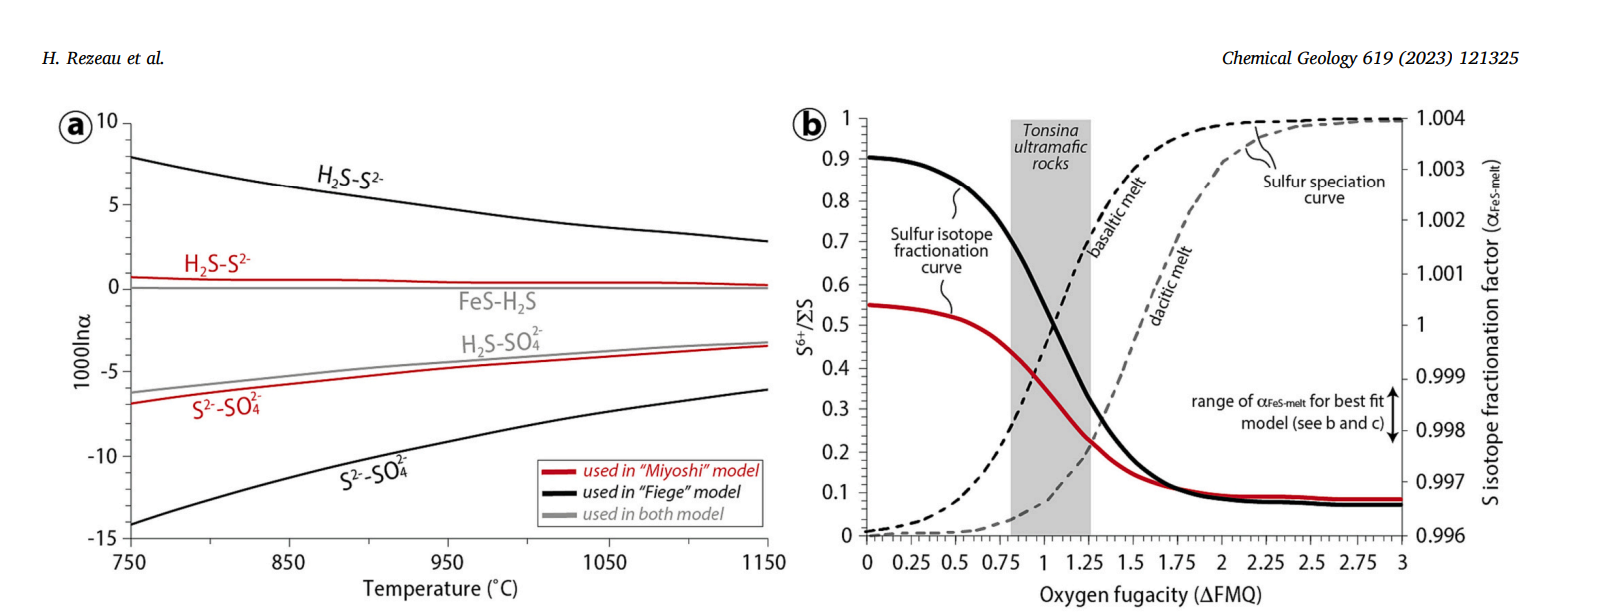

In [37]:
## Example calution for Miyoshi -at 1130 C
df=calculate_S_isotope_factors(T_K=1130+273.15)
df

,T_K,T_C,lna_FeS_H2S_1000,lna_S2_SO4_1000_M,lna_H2S_SO4_1000_M,lna_H2S_S2_1000_M,lna_FeS_S2_1000_M,lna_FeS_SO4_1000_M,lna_H2S_SO4_1000_F,lna_H2S_S2_1000_F,lna_S2_SO4_1000_F,lna_FeS_S2_1000_F,lna_FeS_SO4_1000_F,a_Fe_S2_F,a_Fe_SO4_F,a_Fe_S2_M,a_Fe_SO4_M
0,1403.15,1130.0,0.036198,-3.568578,-3.111453,0.457124,0.493323,-3.075255,-3.111453,3.005808,-6.117262,3.042006,-3.075255,1.003047,0.996929,1.000493,0.996929


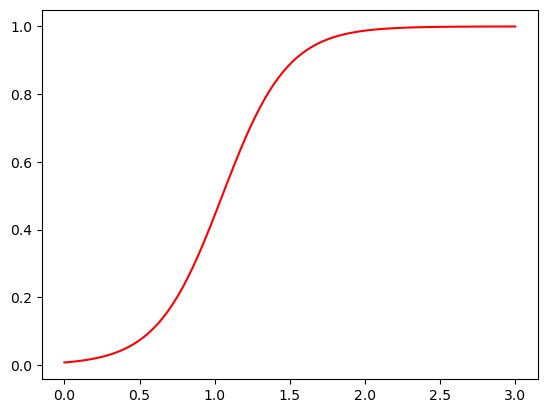

In [40]:

a_FeS_ST_F=Sprop*df['a_Fe_SO4_F'].iloc[0]+ (1-Sprop)*df['a_Fe_S2_F'].iloc[0]
a_FeS_ST_M=Sprop*df['a_Fe_SO4_M'].iloc[0]+ (1-Sprop)*df['a_Fe_S2_M'].iloc[0]

Text(0, 0.5, 'α Sulfide/melt')

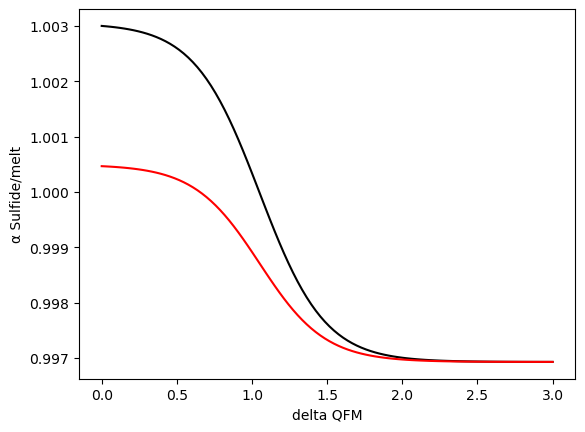

In [61]:
plt.plot(QFM, a_FeS_ST_F, '-k')
plt.plot(QFM, a_FeS_ST_M, '-r')
plt.xlabel('delta QFM')
plt.ylabel('α Sulfide/melt')

## What bout for Kilauea

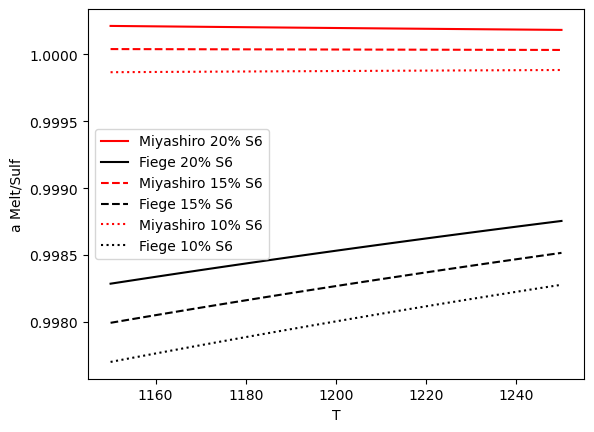

In [68]:
T=np.linspace(1150, 1250, 100)
Kil_factors_20=calculate_S_isotope_factors(T_K=T+273.15, S6St_Liq=0.2)
Kil_factors_15=calculate_S_isotope_factors(T_K=T+273.15, S6St_Liq=0.15)
Kil_factors_10=calculate_S_isotope_factors(T_K=T+273.15, S6St_Liq=0.1)
plt.plot(T, 1/Kil_factors_20['a_FeS_ST_M'], '-r', label='Miyashiro 20% S6')
plt.plot(T, 1/Kil_factors_20['a_FeS_ST_F'], '-k', label='Fiege 20% S6')
plt.plot(T, 1/Kil_factors_15['a_FeS_ST_M'], '--r', label='Miyashiro 15% S6')
plt.plot(T, 1/Kil_factors_15['a_FeS_ST_F'], '--k', label='Fiege 15% S6')
plt.plot(T, 1/Kil_factors_10['a_FeS_ST_M'], ':r', label='Miyashiro 10% S6')
plt.plot(T, 1/Kil_factors_10['a_FeS_ST_F'], ':k', label='Fiege 10% S6')
plt.xlabel('T')
plt.ylabel('a Melt/Sulf')
plt.legend()

## Benchmark to their calcs in their table

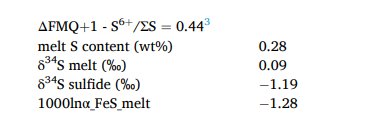

In [43]:
df_parental=calculate_S_isotope_factors(T_K=129.5+273.15, S6St_Liq=0.44)
df_parental

,T_K,T_C,lna_FeS_H2S_1000,lna_S2_SO4_1000_M,lna_H2S_SO4_1000_M,lna_H2S_S2_1000_M,lna_FeS_S2_1000_M,lna_FeS_SO4_1000_M,lna_H2S_SO4_1000_F,lna_H2S_S2_1000_F,lna_S2_SO4_1000_F,lna_FeS_S2_1000_F,lna_FeS_SO4_1000_F,a_Fe_S2_F,a_Fe_SO4_F,a_Fe_S2_M,a_Fe_SO4_M,a_FeS_ST_F,a_FeS_ST_M
0,402.65,129.5,1.531852,-45.453224,-39.902021,5.551203,7.083055,-38.370169,-39.902021,64.361155,-104.263176,65.893007,-38.370169,1.068112,0.962357,1.007108,0.962357,1.02158,0.987418


In [48]:
d34d32S_melt=ss.convert_d34_to_3432S(d34S=0.09)
d34d32S_system=ss.convert_d34_to_3432S(d34S=0)
d34d32S_system

0.04416258898761681

In [57]:
d34S_sulfide=ss.convert_3432S_to_d34(ss.convert_d34_to_3432S(d34S=0.09))
d34S_sulfide

0.08999999999992347

In [58]:

d34d32S_sulfide=d34d32S_system*df_parental['a_FeS_ST_M']
d34S_sulfide=ss.convert_3432S_to_d34(S3432=d34d32S_sulfide)
print(d34S_sulfide)

0   -12.582486
Name: a_FeS_ST_M, dtype: float64


In [60]:
d34d32S_melt=d34d32S_system/df_parental['a_FeS_ST_M']
d34S_melt=ss.convert_3432S_to_d34(S3432=d34d32S_melt)
d34S_melt

0    12.742823
Name: a_FeS_ST_M, dtype: float64

In [54]:
d34d32S_sulfide

0    0.043611
Name: a_FeS_ST_M, dtype: float64